In [61]:
import pandas as pd
import numpy as np
import prophet
from make_series import *
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

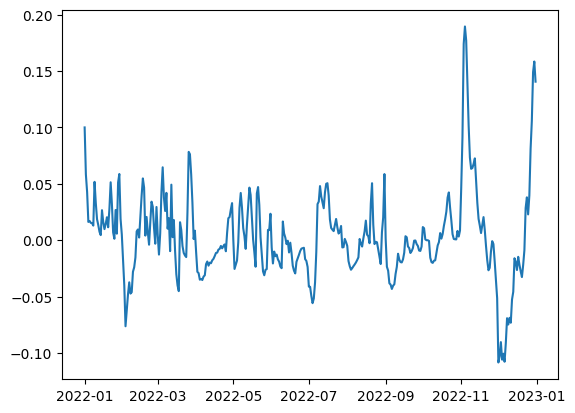

In [62]:
# Соберем нужные данные
df = pd.read_excel('data/normalized_data.xlsx')
series_old = make_series(df, 'Бакалейные магазины, супермаркеты', is_exponential_smoothing=True)
series = [0.1]
for i in range(1, len(series_old)):
    series.append(series_old[i] - series_old[i-1])
    
series = exponential_smoothing(series, 0.3)
dates = get_all_dates()

# Сделаем график series
plt.plot(dates, series)
plt.show()

# Сделаем из 2 столбцов датафрейм
df = pd.DataFrame({'ds': dates, 'y': series})

In [63]:
model = prophet.Prophet()
model.fit(df)

02:04:24 - cmdstanpy - INFO - Chain [1] start processing
02:04:24 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
future = model.make_future_dataframe(periods=10)
forecast = model.predict(future)

In [65]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,0.004500,-0.033466,0.065608,0.004500,0.004500,0.011921,0.011921,0.011921,0.011921,0.011921,0.011921,0.0,0.0,0.0,0.016421
1,2022-01-02,0.004492,-0.039566,0.058366,0.004492,0.004492,0.003577,0.003577,0.003577,0.003577,0.003577,0.003577,0.0,0.0,0.0,0.008069
2,2022-01-03,0.004484,-0.048981,0.051182,0.004484,0.004484,-0.003211,-0.003211,-0.003211,-0.003211,-0.003211,-0.003211,0.0,0.0,0.0,0.001272
3,2022-01-04,0.004476,-0.049581,0.050251,0.004476,0.004476,-0.006032,-0.006032,-0.006032,-0.006032,-0.006032,-0.006032,0.0,0.0,0.0,-0.001557
4,2022-01-05,0.004468,-0.051694,0.046618,0.004468,0.004468,-0.005683,-0.005683,-0.005683,-0.005683,-0.005683,-0.005683,0.0,0.0,0.0,-0.001215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,2023-01-06,0.001609,-0.044934,0.053879,0.001609,0.001609,0.003213,0.003213,0.003213,0.003213,0.003213,0.003213,0.0,0.0,0.0,0.004822
371,2023-01-07,0.001601,-0.037554,0.063306,0.001601,0.001602,0.011921,0.011921,0.011921,0.011921,0.011921,0.011921,0.0,0.0,0.0,0.013523
372,2023-01-08,0.001594,-0.044254,0.054973,0.001594,0.001594,0.003577,0.003577,0.003577,0.003577,0.003577,0.003577,0.0,0.0,0.0,0.005171
373,2023-01-09,0.001586,-0.052101,0.046500,0.001586,0.001586,-0.003211,-0.003211,-0.003211,-0.003211,-0.003211,-0.003211,0.0,0.0,0.0,-0.001625


In [66]:
df

,ds,y
0,2022-01-01,0.100000
1,2022-01-02,0.058272
2,2022-01-03,0.042675
3,2022-01-04,0.016165
4,2022-01-05,0.017041
...,...,...
360,2022-12-27,0.081009
361,2022-12-28,0.105815
362,2022-12-29,0.149078
363,2022-12-30,0.158459


In [67]:
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))
cmp_df

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2022-01-01,0.016421,-0.033466,0.065608,0.100000
2022-01-02,0.008069,-0.039566,0.058366,0.058272
2022-01-03,0.001272,-0.048981,0.051182,0.042675
2022-01-04,-0.001557,-0.049581,0.050251,0.016165
2022-01-05,-0.001215,-0.051694,0.046618,0.017041
...,...,...,...,...
2023-01-06,0.004822,-0.044934,0.053879,NaN
2023-01-07,0.013523,-0.037554,0.063306,NaN
2023-01-08,0.005171,-0.044254,0.054973,NaN


In [68]:
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']

cmp_df

,yhat,yhat_lower,yhat_upper,y,e,p
ds,,,,,,
2022-01-01,0.016421,-0.033466,0.065608,0.100000,0.083579,83.578994
2022-01-02,0.008069,-0.039566,0.058366,0.058272,0.050203,86.152694
2022-01-03,0.001272,-0.048981,0.051182,0.042675,0.041402,97.018377
2022-01-04,-0.001557,-0.049581,0.050251,0.016165,0.017722,109.629131
2022-01-05,-0.001215,-0.051694,0.046618,0.017041,0.018256,107.129227
...,...,...,...,...,...,...
2023-01-06,0.004822,-0.044934,0.053879,NaN,NaN,NaN
2023-01-07,0.013523,-0.037554,0.063306,NaN,NaN,NaN
2023-01-08,0.005171,-0.044254,0.054973,NaN,NaN,NaN


In [69]:
print('MAPE', np.mean(abs(cmp_df['p'])))
print('MAE', np.mean(abs(cmp_df['e'])))

MAPE 174.49461677474847
MAE 0.026855658143026786


In [70]:
# Попробуем сделать прогноз на определленую дату
future = model.make_future_dataframe(periods=1)
forecast = model.predict(future)
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,0.004500,-0.032857,0.064911,0.004500,0.004500,0.011921,0.011921,0.011921,0.011921,0.011921,0.011921,0.0,0.0,0.0,0.016421
1,2022-01-02,0.004492,-0.047321,0.056972,0.004492,0.004492,0.003577,0.003577,0.003577,0.003577,0.003577,0.003577,0.0,0.0,0.0,0.008069
2,2022-01-03,0.004484,-0.048644,0.053151,0.004484,0.004484,-0.003211,-0.003211,-0.003211,-0.003211,-0.003211,-0.003211,0.0,0.0,0.0,0.001272
3,2022-01-04,0.004476,-0.049693,0.045922,0.004476,0.004476,-0.006032,-0.006032,-0.006032,-0.006032,-0.006032,-0.006032,0.0,0.0,0.0,-0.001557
4,2022-01-05,0.004468,-0.054186,0.048818,0.004468,0.004468,-0.005683,-0.005683,-0.005683,-0.005683,-0.005683,-0.005683,0.0,0.0,0.0,-0.001215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2022-12-28,0.001678,-0.051129,0.042858,0.001678,0.001678,-0.005683,-0.005683,-0.005683,-0.005683,-0.005683,-0.005683,0.0,0.0,0.0,-0.004005
362,2022-12-29,0.001670,-0.052210,0.048935,0.001670,0.001670,-0.003785,-0.003785,-0.003785,-0.003785,-0.003785,-0.003785,0.0,0.0,0.0,-0.002115
363,2022-12-30,0.001663,-0.041091,0.058446,0.001663,0.001663,0.003213,0.003213,0.003213,0.003213,0.003213,0.003213,0.0,0.0,0.0,0.004875
364,2022-12-31,0.001655,-0.032533,0.061979,0.001655,0.001655,0.011921,0.011921,0.011921,0.011921,0.011921,0.011921,0.0,0.0,0.0,0.013576
